## Introdução

### Objetivo da Análise
O problema em análise é o **desligamento de funcionários** (*attrition*) em uma empresa. O objetivo principal é identificar e entender os fatores que levam os funcionários a deixarem o seu trabalho para que medidas possam ser tomadas para resolver esse problema.

### Descrição da Base
- **Age**: Idade do funcionário.
- **Attrition**: Indica se o funcionário deixou a empresa (`Yes`) ou não (`No`).
- **Department**: O departamento em que o funcionário trabalha, como Vendas (*Sales*) ou Pesquisa e Desenvolvimento (*Research & Development*).
- **DistanceFromHome**: Distância, em milhas, da casa do funcionário até o local de trabalho.
- **Education**: Nível de educação do funcionário, representado por um valor numérico (1 = Ensino Médio, 2 = Graduação, etc.).
- **EducationField**: Campo de estudo em que o funcionário se formou, como Ciências da Vida, Medicina, entre outros.
- **EnvironmentSatisfaction**: Grau de satisfação do funcionário com o ambiente de trabalho (1 = Baixa, 4 = Alta).
- **JobSatisfaction**: Nível de satisfação do funcionário com seu trabalho atual (1 = Baixa, 4 = Alta).
- **MaritalStatus**: Estado civil do funcionário (Solteiro, Casado, etc.).
- **MonthlyIncome**: Renda mensal do funcionário.
- **NumCompaniesWorked**: Número de empresas em que o funcionário já trabalhou anteriormente.
- **WorkLifeBalance**: Equilíbrio percebido entre vida pessoal e trabalho (1 = Pobre, 4 = Excelente).
- **YearsAtCompany**: Quantidade de anos que o funcionário trabalhou na empresa atual.

## Imports

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder

## Leitura da Base

In [61]:
df = pd.read_csv("attrition_data.csv")
display(df.head())

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


## Pré-Processamento

#### Visão Geral Inicial da Base
**Total de registros**: 1470

**Total de colunas**: 13

**Obs:** Nenhuma coluna tem valores nulos.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


## Análises

In [63]:
# Filtrando o DataFrame para incluir apenas desligamentos
df_attrition_yes = df[df['Attrition'] == 'Yes']

## Distribuição de Desligamento

**Obs**

- Aqui notamos que a proporção de funcionários desligados é menor que a proporção de funcionários não desligados, mas mesmo assim, buscamos entender se tinha alguma anormalidade dentro dos desligamentos. 

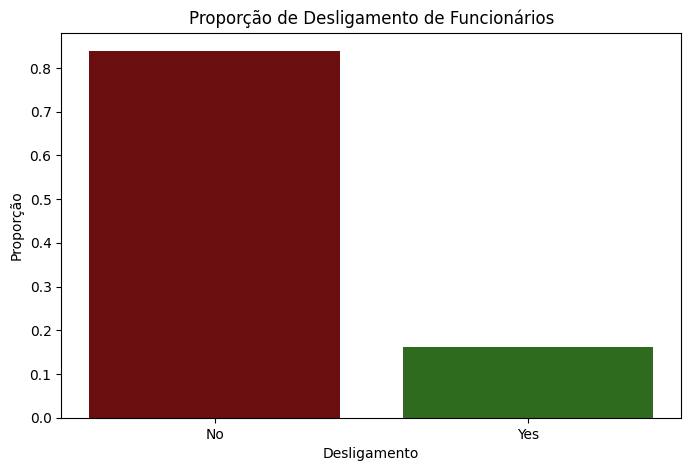

In [64]:
attrition_counts = df['Attrition'].value_counts(normalize=True) # Calculando as proporções de "sim" e "não"
attrition_counts = attrition_counts.reset_index() # resetando o index para transformar o Series em um DataFrame
attrition_counts.columns = ['Desligamento', 'Proporção'] # Renomeando as colunas


plt.figure(figsize=(8, 5)) # Definindo o tamanho da figura
plt.bar(attrition_counts['Desligamento'], attrition_counts['Proporção'], color=['#6B0E10', '#2F6B1E']) # Configurando gráfico de barras
plt.title('Proporção de Desligamento de Funcionários') # Definindo o título
plt.xlabel('Desligamento') # Definindo o nome do eixo X
plt.ylabel('Proporção') # Definindo o nome do eixo Y
plt.show() # Mostrando gráfico

## Matriz de Correlação da Base Toda
**Observações:**

- Na matriz de correlação, observamos que os fatores mais interligados são a idade do funcionário e a renda mensal. Funcionários mais experientes geralmente recebem salários mais altos devido a promoções e aumentos salariais. Isso justifica a correlação entre idade e renda mensal. A experiência e a antiguidade na empresa também podem aumentar a probabilidade de permanência dos funcionários, em busca de estabilidade e valorização.

- Notamos também uma correlação significativa entre a renda mensal e os anos de empresa. Funcionários que permanecem mais tempo tendem a receber aumentos salariais ao longo da carreira, o que fortalece essa correlação. A dedicação a longo prazo geralmente resulta em reconhecimento financeiro.

- As colunas "Estado Civil" e "Desligamento" também estão correlacionadas. Funcionários casados ou com família podem buscar maior estabilidade e melhores condições de trabalho, como flexibilidade de horário e benefícios. Caso a empresa não ofereça esses suportes, esses funcionários podem estar mais propensos ao desligamento.

- A relação entre "Departamento" e "Desligamento" sugere que departamentos com alta pressão, como vendas ou áreas operacionais, podem ter maior rotatividade, especialmente se exigem longas jornadas ou afetam o equilíbrio entre vida pessoal e profissional.

- Em relação às outras colunas, o "Estado Civil" também está bem relacionado ao "Departamento". A distribuição de funcionários casados ou solteiros pode variar por departamento. Por exemplo, áreas que exigem viagens constantes podem ter mais solteiros, enquanto departamentos administrativos podem atrair funcionários que buscam estabilidade, como pessoas casadas ou com filhos.

Essas observações levantam hipóteses sobre as relações entre as colunas, que serão confirmadas ao longo da análise.

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categories', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))   # Codificando colunas categóricas
    ],
    remainder='passthrough',
    verbose_feature_names_out= False 
)

In [66]:
df_encode_base_toda = df
df_encode_base_toda = pd.DataFrame(preprocessor.fit_transform(df_encode_base_toda), columns=preprocessor.get_feature_names_out())
# display(df_encode)

In [67]:
matriz_corr = df_encode_base_toda.corr()
# display(matriz_corr.head())

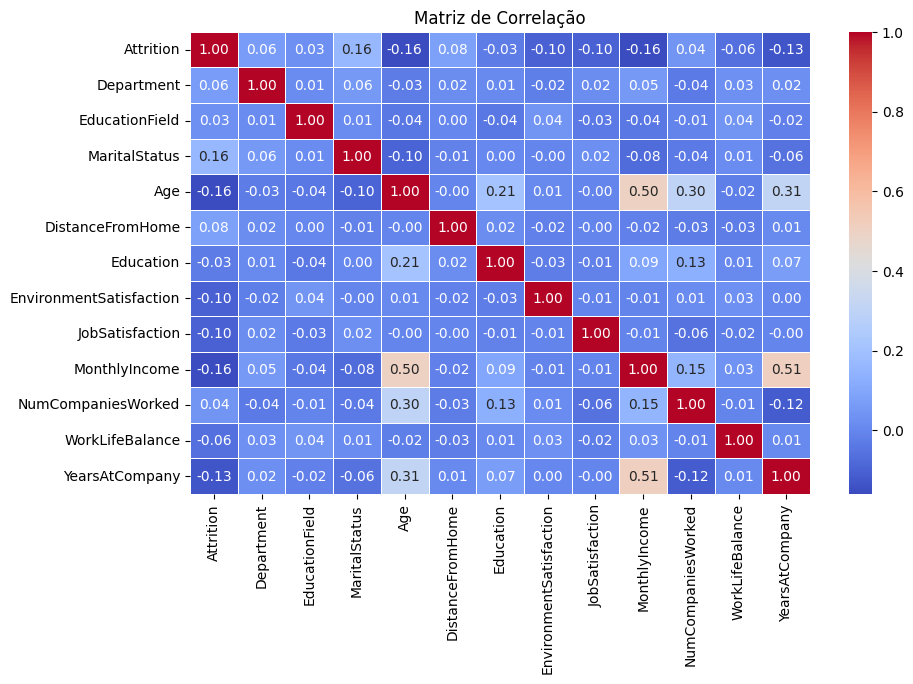

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

## Contagem da distância do trabalho em relação aos desligamentos
**Observações:**

- Deslocamentos longos impactam o tempo de descanso e a qualidade de vida do funcionário, gerando cansaço e frustração. Isso pode resultar em menor satisfação e maior probabilidade de desligamento, já que os funcionários buscam reduzir o estresse e melhorar sua rotina. No entanto, percebemos que a distância do trabalho não é um fator relevante para os desligamentos, pois a maioria dos funcionários mora perto do trabalho.

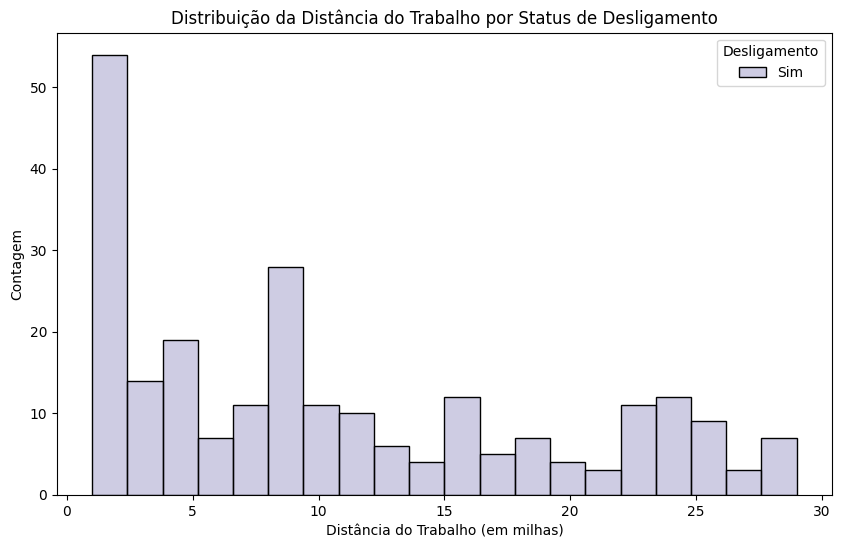

In [71]:
# Histograma para visualizar a distribuição da distância de trabalho
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Attrition'] == 'Yes'], x='DistanceFromHome', hue='Attrition', kde=False, bins=20, palette='Purples')
plt.title('Distribuição da Distância do Trabalho por Status de Desligamento')
plt.xlabel('Distância do Trabalho (em milhas)')
plt.ylabel('Contagem')
plt.legend(title='Desligamento', labels=['Sim'])
plt.show()

## Análise por departamento

### Proporção de desligamentos em cada departamento

**Observações:**

- O departamento de Research & Development apresenta um número muito maior de desligamentos em comparação aos outros departamentos.
Essa alta taxa de desligamentos pode estar relacionada ao fato de haver mais funcionários nesse departamento.
Para uma análise mais precisa, comparamos a proporção de desligamentos por departamento.

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\3030698215.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Department", y="Count", data=attrition_counts_by_department, palette='deep')


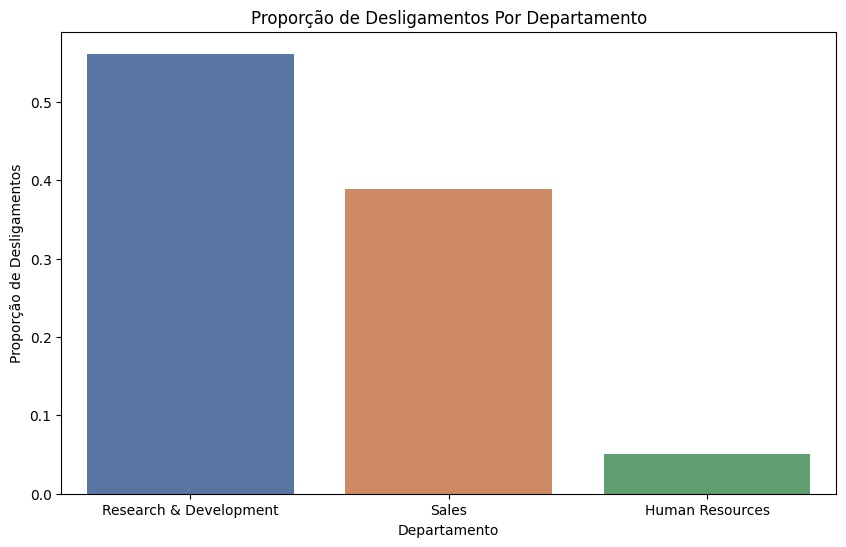

In [72]:
# Usando value_counts para contar desligamentos por departamento
attrition_counts_by_department = df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize=True).reset_index()

# Renomeando as colunas
attrition_counts_by_department.columns = ['Department', 'Count']

# Criando o gráfico de barras

plt.figure(figsize=(10, 6))
sns.barplot(x="Department", y="Count", data=attrition_counts_by_department, palette='deep')
plt.title('Proporção de Desligamentos Por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Proporção de Desligamentos')
plt.show()

### Satisfação no trabalho por departamento

**Observações:**

- A satisfação no trabalho é crucial para a retenção de funcionários, e departamentos com níveis consistentemente baixos de satisfação podem ser mais vulneráveis a altas taxas de desligamento. Funcionários insatisfeitos tendem a deixar a empresa. No entanto, mesmo o departamento de Research & Development, que apresenta a maior taxa de desligamento, é avaliado positivamente. Portanto, podemos concluir que a insatisfação no trabalho não é o principal fator que leva ao desligamento.

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\232112192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Department', y='JobSatisfaction', ci=None, palette='deep')
C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\232112192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Department', y='JobSatisfaction', ci=None, palette='deep')


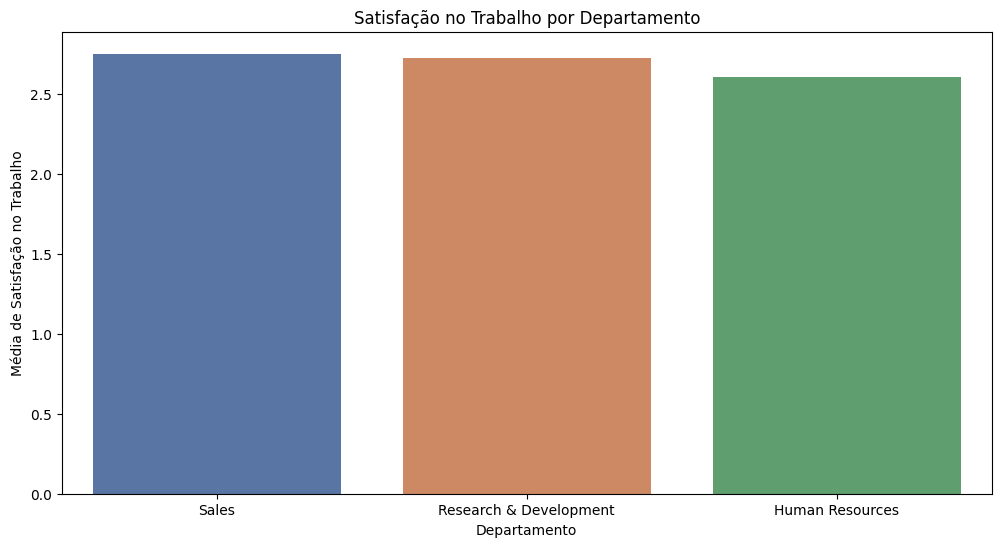

In [73]:
# Gráfico de barras para Satisfação no Trabalho por Departamento
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Department', y='JobSatisfaction', ci=None, palette='deep')
plt.title('Satisfação no Trabalho por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Média de Satisfação no Trabalho')
plt.show()

### Média de satisfação com o ambiente de trabalho por departamento

**Observações:**

- A satisfação no trabalho é crucial para a retenção de funcionários, e departamentos com níveis consistentemente baixos de satisfação podem ser mais vulneráveis a altas taxas de desligamento. Funcionários insatisfeitos tendem a deixar a empresa. No entanto, mesmo o departamento de Research & Development, que apresenta a maior taxa de desligamento, é avaliado positivamente. Portanto, podemos concluir que a insatisfação no trabalho não é o principal fator que leva ao desligamento.

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\336373122.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Department', y='EnvironmentSatisfaction', ci=None, estimator='mean', palette='deep')
C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\336373122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Department', y='EnvironmentSatisfaction', ci=None, estimator='mean', palette='deep')


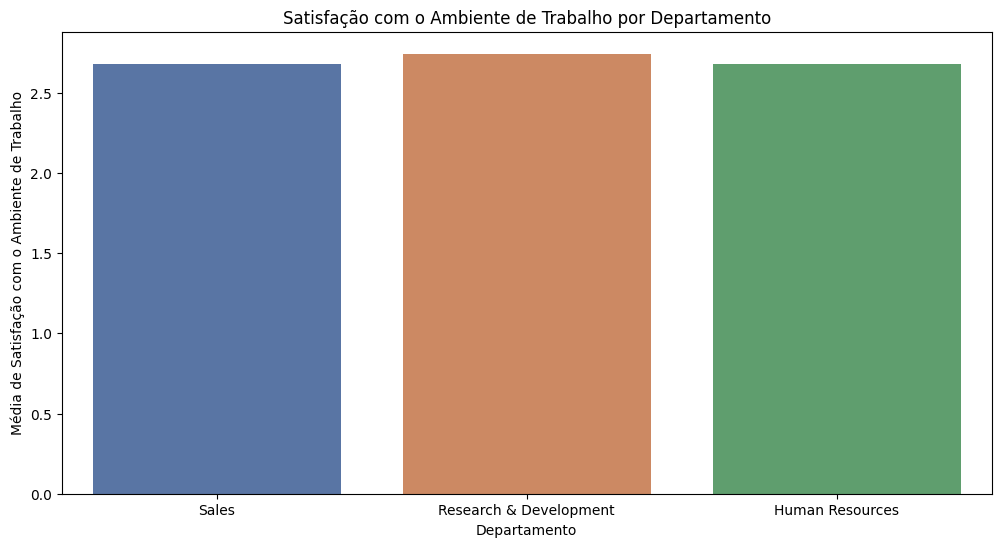

In [74]:
# Gráfico de barras para Satisfação com o Ambiente de Trabalho por Departamento
plt.figure(figsize=(12, 6))

# Exibe a média de 'EnvironmentSatisfaction' por 'Department'
sns.barplot(data=df, x='Department', y='EnvironmentSatisfaction', ci=None, estimator='mean', palette='deep')

# Ajustes de título e rótulos
plt.title('Satisfação com o Ambiente de Trabalho por Departamento')  # Título claro
plt.xlabel('Departamento')  # Rótulo do eixo X
plt.ylabel('Média de Satisfação com o Ambiente de Trabalho')  # Rótulo do eixo Y
plt.show()

### Média salarial por departamento

**Observações:**

- A satisfação com o ambiente de trabalho é fundamental para a retenção de funcionários. Ambientes agradáveis e uma cultura organizacional positiva promovem bem-estar e lealdade. Em contraste, ambientes tóxicos podem aumentar a insatisfação e levar à busca de novas oportunidades. Apesar do departamento de Research & Development ter a maior taxa de desligamento, ele é bem avaliado em relação ao ambiente de trabalho, indicando que isso não é um motivo significativo para os desligamentos.

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\2160162544.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_attrition_yes, x='Department', y='MonthlyIncome', ci=None, palette='deep')
C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\2160162544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_attrition_yes, x='Department', y='MonthlyIncome', ci=None, palette='deep')


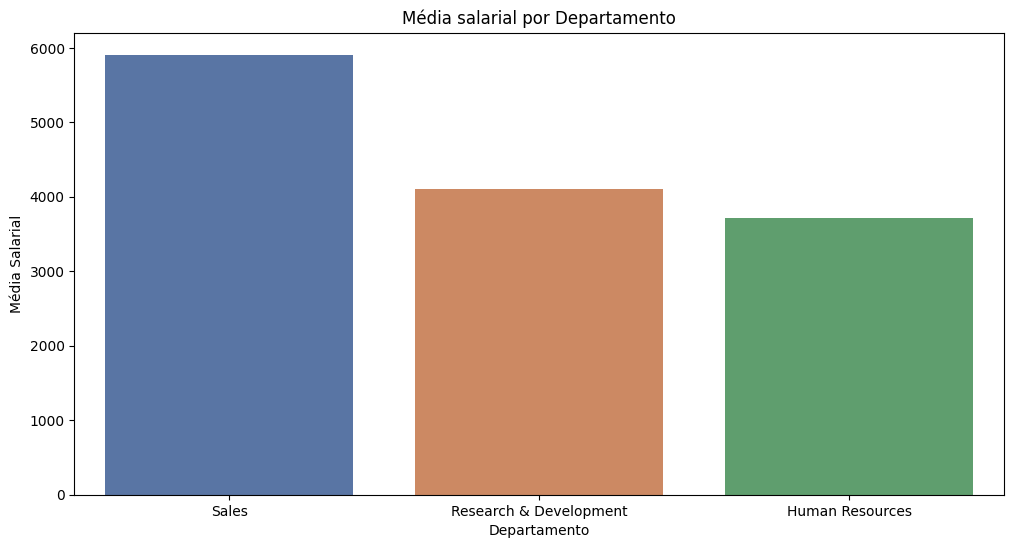

In [75]:
# Gráfico de barras para Satisfação no Trabalho por Departamento
plt.figure(figsize=(12, 6))
sns.barplot(data=df_attrition_yes, x='Department', y='MonthlyIncome', ci=None, palette='deep')
plt.title('Média salarial por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Média Salarial')
plt.show()

### Distribuição salarial por departamento

**Observações:**

- Os histogramas mostram a distribuição salarial, permitindo verificar se a média salarial é afetada por outliers. Isso sugere que o salário pode não ser a principal causa dos altos desligamentos no departamento de Research & Development, já que o departamento de Human Resources possui condições semelhantes, mas não apresenta uma taxa alta de desligamentos.


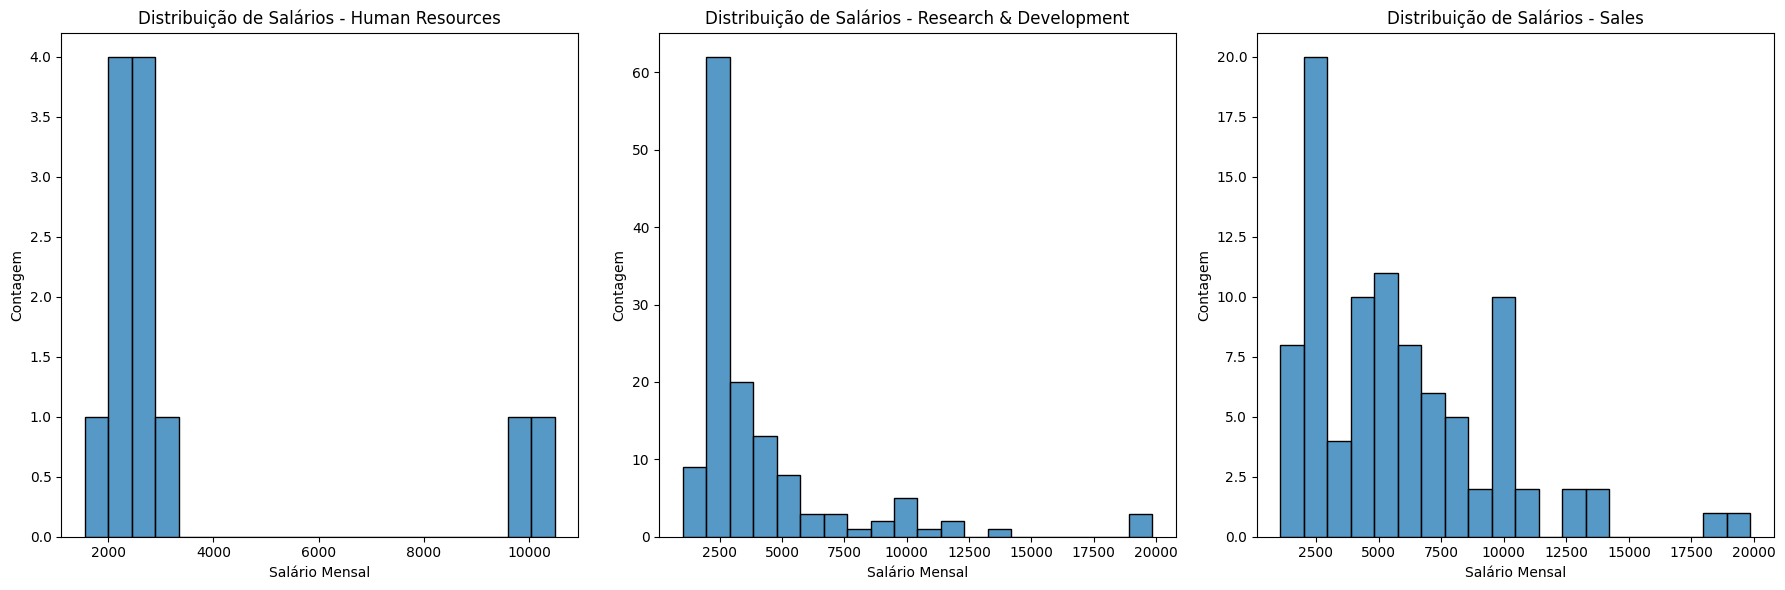

In [76]:
# Ajuste o tamanho da figura para caber três gráficos em uma linha
plt.figure(figsize=(18, 6))

# Lista dos departamentos
departamentos = ['Human Resources', 'Research & Development', 'Sales']

# Cria um histograma para cada departamento
for i, departamento in enumerate(departamentos, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_attrition_yes[df_attrition_yes['Department'] == departamento], x='MonthlyIncome', bins=20)
    plt.title(f'Distribuição de Salários - {departamento}')
    plt.xlabel('Salário Mensal')
    plt.ylabel('Contagem')

# Ajusta o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()

### Equilíbrio entre a vida pessoal e o trabalho por departamento

**Observações:**

- Quando o trabalho consome muito da vida pessoal, causando estresse, a insatisfação aumenta. Isso leva os profissionais a buscar empresas com políticas de flexibilidade. Departamentos rigorosos têm maior rotatividade, pois os funcionários priorizam a qualidade de vida. No entanto, a diferença na média de equilíbrio entre vida pessoal e trabalho no departamento de Research & Development em comparação aos outros não é tão grande, sugerindo que não é o único fator que contribui para a alta taxa de desligamentos.

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\674964023.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_attrition_yes, x='Department', y='WorkLifeBalance', palette='deep', ci= None)
C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\674964023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_attrition_yes, x='Department', y='WorkLifeBalance', palette='deep', ci= None)


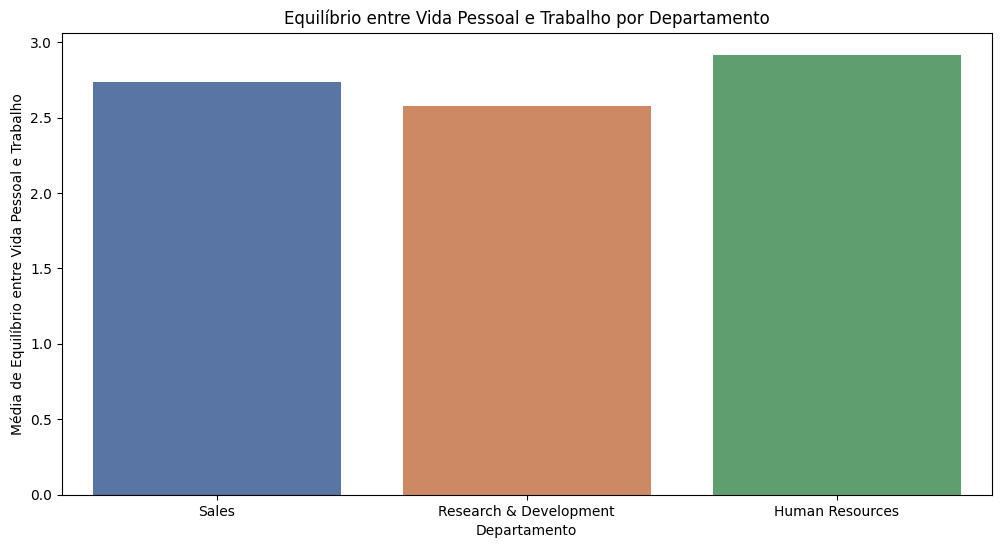

In [83]:
# Supondo que 'df' seja o seu DataFrame com as informações
plt.figure(figsize=(12, 6))
sns.barplot(data=df_attrition_yes, x='Department', y='WorkLifeBalance', palette='deep', ci= None)
plt.title('Equilíbrio entre Vida Pessoal e Trabalho por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Média de Equilíbrio entre Vida Pessoal e Trabalho')
plt.show()

## Análise da Educação

### Nível de educação por departamento

**Observações:**
- O nível de educação impacta o desligamento, pois funcionários mais educados buscam valorização e desafios. Quando não encontram essas condições, podem optar por deixar a empresa. Apesar de Research & Development ter um nível de educação semelhante ao departamento de Sales, que é mais valorizado, a insatisfação pode ocorrer devido à desconexão entre a cultura organizacional e as expectativas dos funcionários.

Vamos olhar isso mais de perto:

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\2849915857.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_attrition_yes, x='Department', y='Education', ci=None)


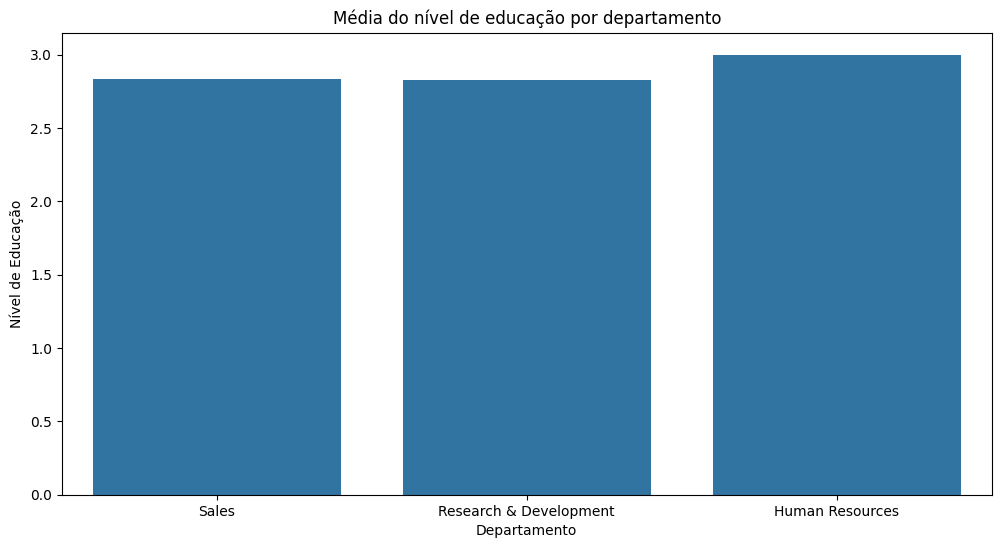

In [78]:
# Gráfico de barras para Satisfação no Trabalho por Departamento
plt.figure(figsize=(12, 6))
sns.barplot(data=df_attrition_yes, x='Department', y='Education', ci=None)
plt.title('Média do nível de educação por departamento')
plt.xlabel('Departamento')
plt.ylabel('Nível de Educação')
plt.show()

### Proporção de Campos de Educação por Departamento

**Observações:**

- Os campos de estudo Life Sciences e Medical estão fortemente representados no departamento de Research & Development.

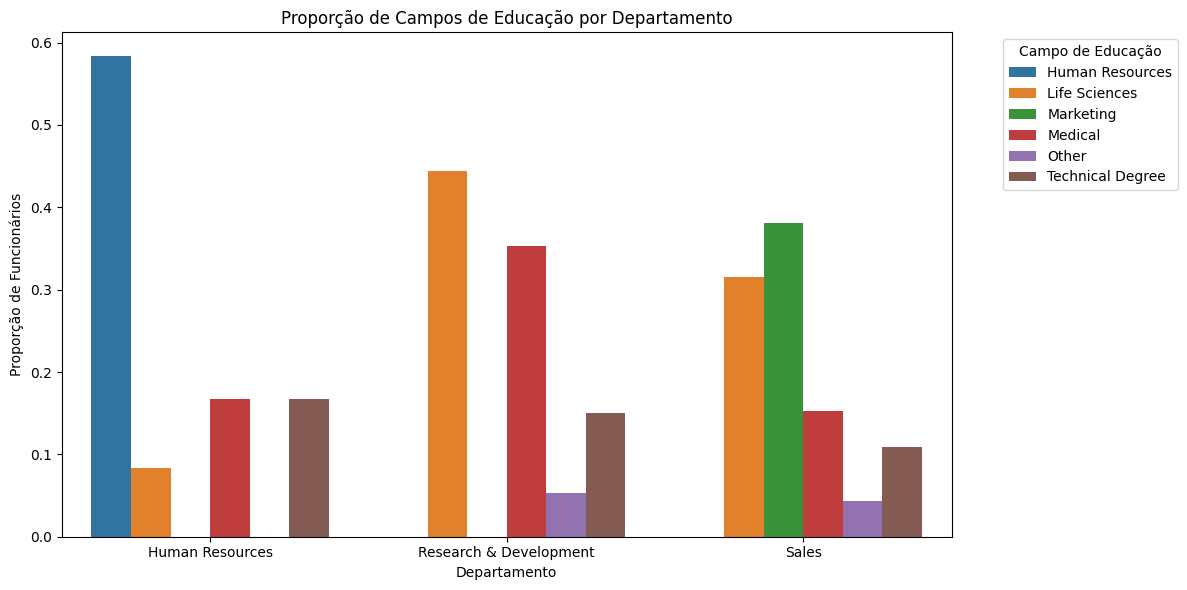

In [87]:
# Calcula a proporção de funcionários por campo de educação dentro de cada departamento
proporcao_departamento_educacao = pd.crosstab(df_attrition_yes['Department'], df_attrition_yes['EducationField'], normalize='index')

# Converte o DataFrame para o formato "longo" para facilitar a visualização no Seaborn
proporcao_long = proporcao_departamento_educacao.reset_index().melt(id_vars='Department', var_name='EducationField', value_name='Proporção')

# Cria o gráfico de barras empilhadas com proporção
plt.figure(figsize=(12, 6))
sns.barplot(data=proporcao_long, x='Department', y='Proporção', hue='EducationField')

# Configurações do gráfico
plt.title('Proporção de Campos de Educação por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Proporção de Funcionários')
plt.legend(title='Campo de Educação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Média salarial por campo de estudo

**Observações:**

Os campos de estudo Life Sciences e Medical, mais presentes no departamento com mais desligamentos, Research & Development, apresentam médias salariais desvalorizadas em comparação ao campo de estudo Marketing. Isso reforça a hipótese de que funcionários mais educados buscam valorização e desafios; ao não encontrá-los, podem se sentir desmotivados e optar por deixar a empresa.

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_14068\513487924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_salarial_educacao, x='Campo de Estudo', y='Média Salarial', palette='viridis')


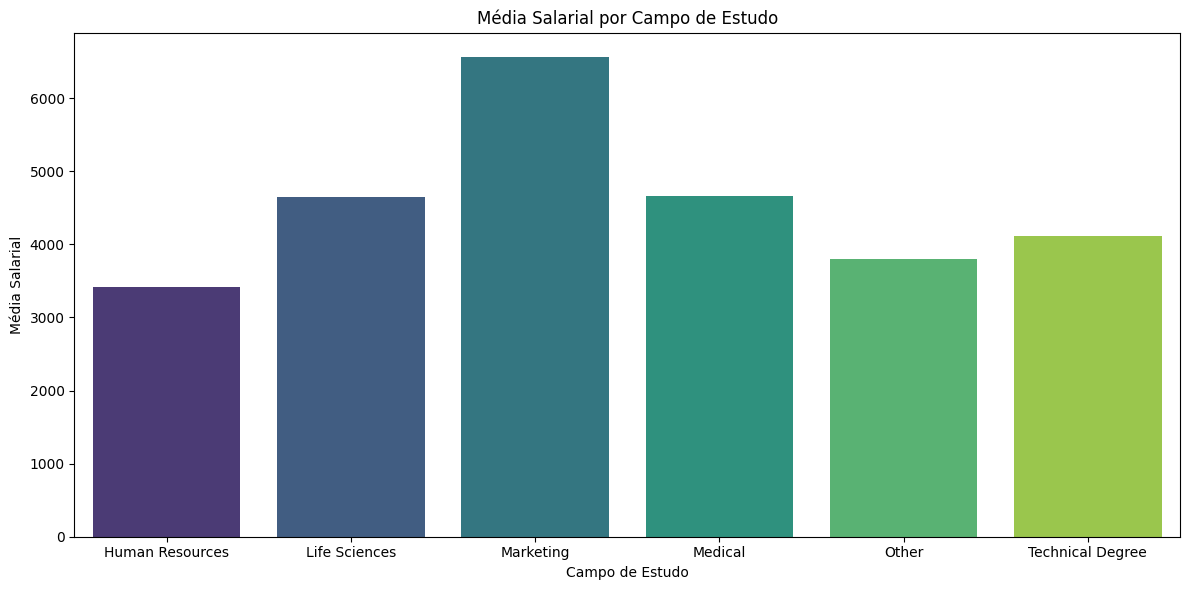

In [86]:
# Calcular a média salarial por campo de estudo
media_salarial_educacao = df_attrition_yes.groupby('EducationField')['MonthlyIncome'].mean().reset_index()

# Renomear a coluna de média para melhor entendimento
media_salarial_educacao.columns = ['Campo de Estudo', 'Média Salarial']

# Criar um gráfico de barras para visualizar a média salarial por campo de estudo
plt.figure(figsize=(12, 6))
sns.barplot(data=media_salarial_educacao, x='Campo de Estudo', y='Média Salarial', palette='viridis')

# Configurações do gráfico
plt.title('Média Salarial por Campo de Estudo')
plt.xlabel('Campo de Estudo')
plt.ylabel('Média Salarial')
plt.tight_layout()
plt.show()

## Conclusão

A análise dos fatores que influenciam o desligamento de funcionários na empresa revelou insights significativos sobre a relação entre salário, satisfação no trabalho, equilíbrio entre vida pessoal e profissional, e nível de educação. Observou-se que a idade e a experiência correlacionam-se com a renda, indicando que funcionários mais antigos são geralmente mais valorizados financeiramente, resultando em maior probabilidade de permanência.

Entretanto, mesmo com altos índices de satisfação no ambiente de trabalho, o departamento de Research & Development, que possui a maior taxa de desligamentos, enfrenta desafios como um equilíbrio insatisfatório entre vida pessoal e trabalho e salários que não refletem a valorização esperada para campos de estudo predominantes, como Life Sciences e Medical. Esses fatores podem levar à insatisfação e à saída de funcionários.

Adicionalmente, o deslocamento não se mostrou um fator determinante para o desligamento, sugerindo que outras variáveis são mais influentes na retenção de talentos. As correlações observadas entre estado civil e desligamento, bem como entre departamento e taxa de rotatividade, indicam a necessidade de uma cultura organizacional que valorize a estabilidade e ofereça melhores condições de trabalho, especialmente em departamentos sob alta pressão.

**Sugestões de melhoria:**
- Revisão Salarial: Ajustar salários de acordo com as expectativas do mercado e dos funcionários.